In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### DATA LOADING

In [2]:
data = pd.read_csv("miami-housing.csv")

In [3]:
data.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [5]:
sns.set_style("whitegrid")

### ANALYSIS

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price of Houses (power of 10^6)')

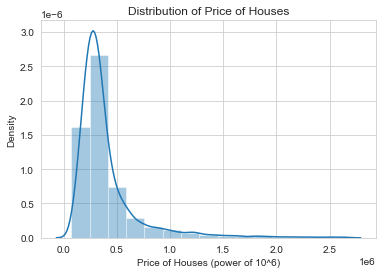

In [7]:
sns.distplot(data["SALE_PRC"], bins=15)
plt.title("Distribution of Price of Houses")
plt.xlabel("Price of Houses (power of 10^6)")

In [8]:
from sklearn.cluster import KMeans

In [9]:
temp_x = data[["LATITUDE","LONGITUDE"]]

#create the clustering algorithm
km = KMeans(n_clusters=2)

In [10]:
km.fit(temp_x)

KMeans(n_clusters=2)

In [11]:
data["LOCATION"] = km.labels_

Text(0.5, 1.0, 'Correlation plot of each feature against every other feature')

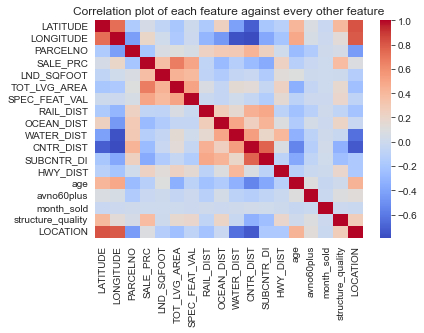

In [13]:
# CHECK THE CORRELATION BETWEEN FEATURES

sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Correlation plot of each feature against every other feature")

In [14]:
data.corr()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality,LOCATION
LATITUDE,1.000000,0.721232,-0.165487,0.047701,-0.077481,-0.193972,-0.007634,-0.172382,0.242735,-0.423396,-0.717348,-0.195823,-0.113443,0.416967,0.081366,-0.023634,0.391989,0.815359
LONGITUDE,0.721232,1.000000,-0.432816,0.195274,0.018242,-0.181007,-0.009372,-0.303155,-0.457477,-0.764256,-0.791968,-0.380220,-0.216406,0.488757,0.059416,-0.010859,0.132893,0.796024
PARCELNO,-0.165487,-0.432816,1.000000,-0.204068,0.071381,0.102439,0.055152,0.223387,0.289232,0.295951,0.419933,0.243888,0.018247,-0.270718,-0.160925,0.011129,0.044652,-0.445361
SALE_PRC,0.047701,0.195274,-0.204068,1.000000,0.363077,0.667301,0.497500,-0.077009,-0.274675,-0.127938,-0.271425,-0.370078,0.231877,-0.123408,-0.027026,0.000325,0.383995,0.084554
LND_SQFOOT,-0.077481,0.018242,0.071381,0.363077,1.000000,0.437472,0.390707,-0.083901,-0.161579,-0.055093,-0.023181,-0.159094,0.130488,0.101244,-0.005899,0.005926,-0.006686,-0.138035
TOT_LVG_AREA,-0.193972,-0.181007,0.102439,0.667301,0.437472,1.000000,0.506064,0.075486,-0.050141,0.148343,0.136526,-0.044882,0.229497,-0.340606,-0.056545,0.002517,0.173422,-0.242346
SPEC_FEAT_VAL,-0.007634,-0.009372,0.055152,0.497500,0.390707,0.506064,1.000000,-0.021965,-0.055155,0.013923,-0.048817,-0.151916,0.153770,-0.098780,-0.008879,-0.014012,0.188030,-0.082483
RAIL_DIST,-0.172382,-0.303155,0.223387,-0.077009,-0.083901,0.075486,-0.021965,1.000000,0.258966,0.162313,0.444494,0.485468,-0.092495,-0.234515,-0.116955,0.010560,-0.074075,-0.224542
OCEAN_DIST,0.242735,-0.457477,0.289232,-0.274675,-0.161579,-0.050141,-0.055155,0.258966,1.000000,0.490764,0.245396,0.425869,0.093500,-0.159409,0.035215,-0.012723,0.209497,-0.022885
WATER_DIST,-0.423396,-0.764256,0.295951,-0.127938,-0.055093,0.148343,0.013923,0.162313,0.490764,1.000000,0.526952,0.195280,0.400233,-0.330578,-0.096339,0.010556,-0.034343,-0.643091


Text(0.5, 1.0, 'LATITUDE vs Sale Price')

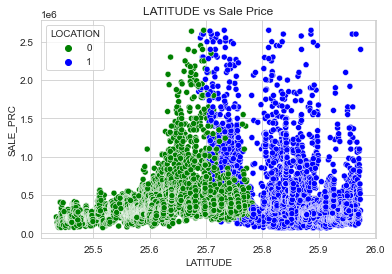

In [19]:
sns.scatterplot(x="LATITUDE",y="SALE_PRC",hue="LOCATION",data=data, palette=["green", "blue"])
plt.title("LATITUDE vs Sale Price")

Text(0.5, 1.0, 'LONGITUDE vs Sale Price')

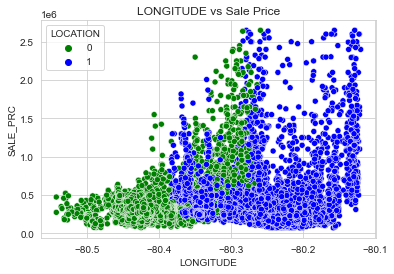

In [20]:
sns.scatterplot(x="LONGITUDE",y="SALE_PRC",hue="LOCATION",data=data, palette=["green", "blue"])
plt.title("LONGITUDE vs Sale Price")

Text(0.5, 1.0, 'LONGITUDE vs LATITUDE')

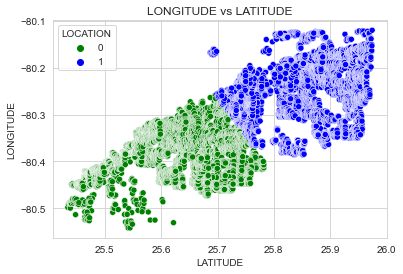

In [21]:
sns.scatterplot(x="LATITUDE",y="LONGITUDE",hue="LOCATION",data=data, palette=["green", "blue"])
plt.title("LONGITUDE vs LATITUDE")

Text(0.5, 1.0, 'Floor Area vs Living Area (in foot)')

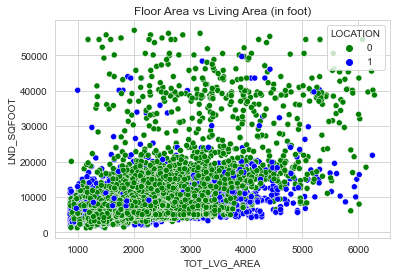

In [22]:
sns.scatterplot(x="TOT_LVG_AREA",y="LND_SQFOOT",hue="LOCATION",data=data, palette=["green", "blue"])
plt.title("Floor Area vs Living Area (in foot)")

Text(0.5, 1.0, 'Distance to the nearest Ocean vs Distance to the nearest water body')

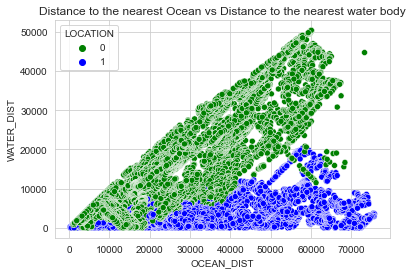

In [24]:
sns.scatterplot(x="OCEAN_DIST",y="WATER_DIST",hue="LOCATION",data=data, palette=["green", "blue"])
plt.title("Distance to the nearest Ocean vs Distance to the nearest water body")

Text(0.5, 1.0, 'Age of House vs Selling Price')

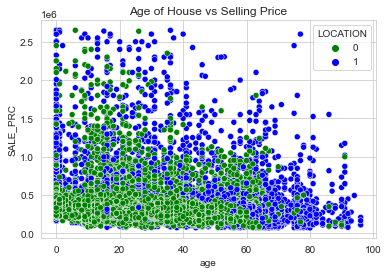

In [25]:
sns.scatterplot(x="age",y="SALE_PRC",hue="LOCATION",data=data, palette=["green", "blue"])
plt.title("Age of House vs Selling Price")

Text(0.5, 1.0, 'Age of House vs Structure Quality of House')

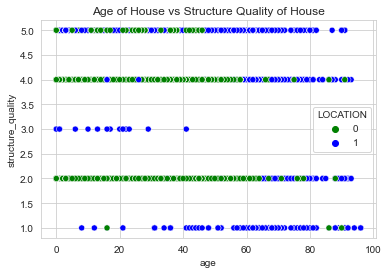

In [26]:
sns.scatterplot(x="age",y="structure_quality",hue="LOCATION",data=data, palette=["green", "blue"])
plt.title("Age of House vs Structure Quality of House")

### SPLIING, TRAINING, AND TESTING OF MACHINE LEARNING MODELS

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor

In [29]:
X = data.drop(["PARCELNO", "SALE_PRC"], axis=1)
Y = data["SALE_PRC"]

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [31]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [47]:
linear = LinearRegression()
rf = RandomForestRegressor(n_estimators=500, random_state=42)
xgb = XGBRegressor()
cat = CatBoostRegressor(random_state=42)

In [48]:
linear.fit(X_train_scaled,y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled,y_train)
cat.fit(X_train_scaled, y_train)

Learning rate set to 0.059319
0:	learn: 302209.6734761	total: 57.6ms	remaining: 57.6s
1:	learn: 290566.7299076	total: 64.4ms	remaining: 32.1s
2:	learn: 279022.0888605	total: 68.5ms	remaining: 22.8s
3:	learn: 268258.2921438	total: 72.4ms	remaining: 18s
4:	learn: 258086.4651810	total: 76ms	remaining: 15.1s
5:	learn: 248769.0062447	total: 79.8ms	remaining: 13.2s
6:	learn: 240127.5162522	total: 83.5ms	remaining: 11.8s
7:	learn: 231704.6399884	total: 87.4ms	remaining: 10.8s
8:	learn: 223850.9496751	total: 91ms	remaining: 10s
9:	learn: 216350.7349159	total: 95ms	remaining: 9.4s
10:	learn: 209336.1902979	total: 98.5ms	remaining: 8.86s
11:	learn: 202947.3251037	total: 102ms	remaining: 8.43s
12:	learn: 197079.2203061	total: 106ms	remaining: 8.05s
13:	learn: 191292.8226345	total: 110ms	remaining: 7.72s
14:	learn: 186176.8171072	total: 118ms	remaining: 7.73s
15:	learn: 181268.7491842	total: 124ms	remaining: 7.62s
16:	learn: 176628.9034324	total: 128ms	remaining: 7.43s
17:	learn: 172066.0725428	to

In [49]:
linear_pred = linear.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
xgb_pred = xgb.predict(X_test_scaled)
cat_pred = cat.predict(X_test_scaled)

### LINEAR REGRESSION EVALUATION

In [50]:
mean_absolute_error(y_test, linear_pred)

115236.4884758256

In [51]:
mean_squared_error(y_test, linear_pred)

31247194593.15155

In [52]:
r2_score(y_test, linear_pred)

0.6997511425235514

### RANDOM FOREST EVALUATION

In [53]:
mean_absolute_error(y_test, rf_pred)

47706.31741172771

In [54]:
mean_squared_error(y_test, rf_pred)

9362316450.973627

In [55]:
r2_score(y_test, rf_pred)

0.9100391297734651

### XGBOOST EVALUATION

In [56]:
mean_absolute_error(y_test, xgb_pred)

47429.279204349696

In [57]:
mean_squared_error(y_test, xgb_pred)

8591922613.794378

In [58]:
r2_score(y_test, xgb_pred)

0.9174417101468937

### CAT BOOST EVALUATION

In [59]:
mean_absolute_error(y_test, cat_pred)

41984.24779740249

In [60]:
mean_squared_error(y_test, cat_pred)

6697144830.004022

In [61]:
r2_score(y_test, cat_pred)

0.9356483002796122

### VISUAL REPRESENTATION OF THE RESULTS OF CAT BOOST

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Prices')

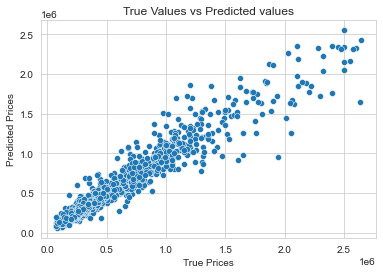

In [64]:
sns.scatterplot(y_test,cat_pred)
plt.title("True Values vs Predicted values")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")